#  #Task 3 : Sales Prediction with CodSoft


# Project: Investigate an advertising dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> These files contain 3 ways of advertising with their amount of sales


### Question(s) / Tasks for Analysis
>Do we have useless columns that needs to be removed?.

>Do we have duplicated data? missing or null values?.

>Do we have outliers?.

>Analysis using scatter plots.

>Analysis using histograms.

>What is the correlation between advetising ways and sales.

>Why Tvs advertising?

In [12]:
#importing libraries
import pandas as pd
import numpy as np
%matplotlib inline
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#loading the data
df= pd.read_csv('advertising.csv')
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


<a id='wrangling'></a>
## Data Wrangling

> In this section, and after setting the questions, the unused columns will be dropped , so it can be more consistent and clear, also it will be free of dupl
icated and missing values.

In [6]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Data is free from null values!

In [7]:
df.duplicated().sum().any()

False

It is also free from duplicated Values!

<a id='eda'></a>
# Data Exploration
> > In this section, and after wrangling the data, the data will be explored to be more understandable to analyze.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


We have 4 columns, 200 entries only, This is a small dataset.

In [10]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


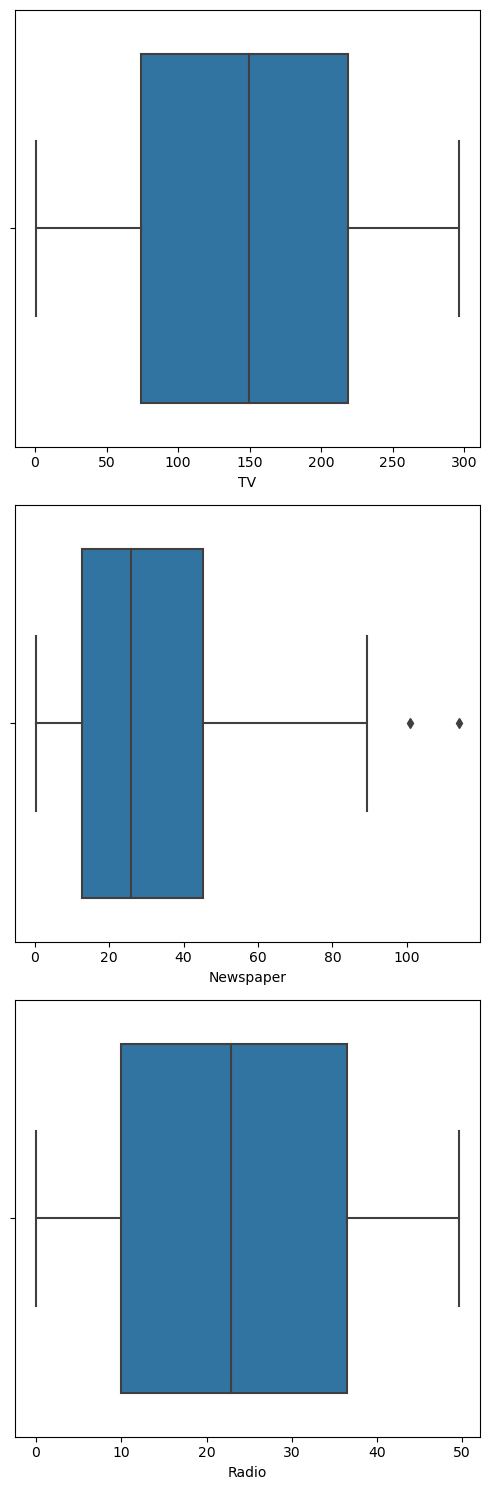

In [19]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize=(5, 15))

# Plot boxplots using seaborn
plt1 = sns.boxplot(x=df['TV'], ax=axs[0])
plt2 = sns.boxplot(x=df['Newspaper'], ax=axs[1])
plt3 = sns.boxplot(x=df['Radio'], ax=axs[2])

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

Looks like Newspaper has outliers!

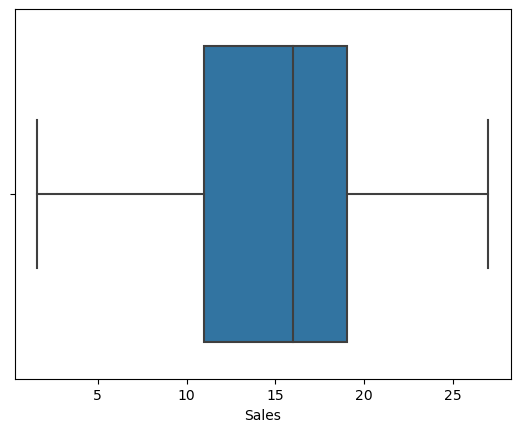

In [23]:
sales_plot= sns.boxplot(x= df['Sales'])
plt.show()


# Analysis using scatter plot

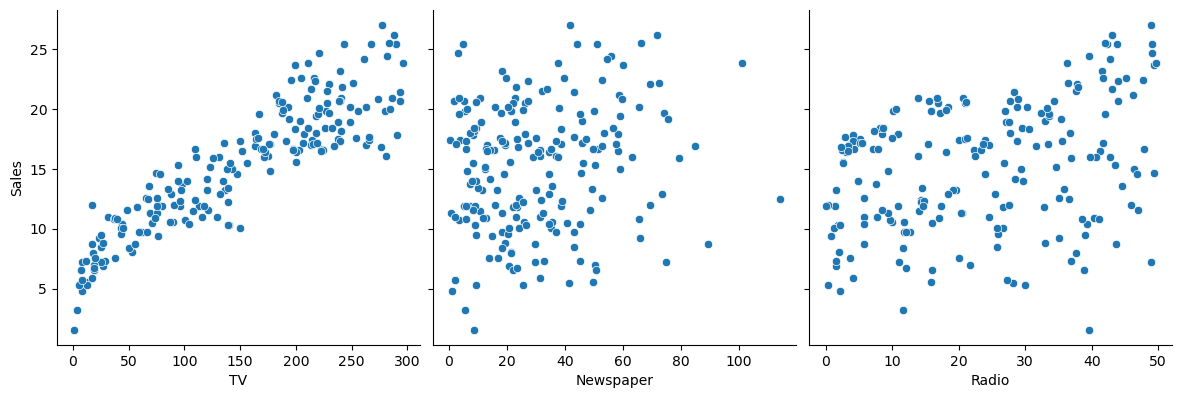

In [29]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

# Analysis using scatter plot

array([[<AxesSubplot:title={'center':'TV'}>,
        <AxesSubplot:title={'center':'Radio'}>],
       [<AxesSubplot:title={'center':'Newspaper'}>,
        <AxesSubplot:title={'center':'Sales'}>]], dtype=object)

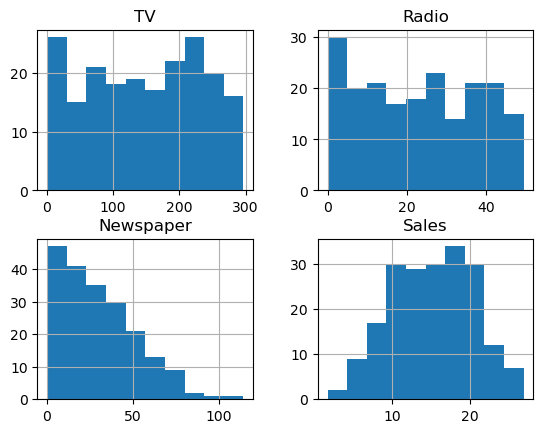

In [33]:
df.hist()

TVs advertising seems to be have most sales!
Let's ensure with seeing the correlation:

# Correlations:

In [34]:
correlation = df['TV'].corr(df['Sales'])

# Print the correlation coefficient
print("Correlation between TV advertising and sales:", correlation)

Correlation between TV advertising and sales: 0.9012079133023306


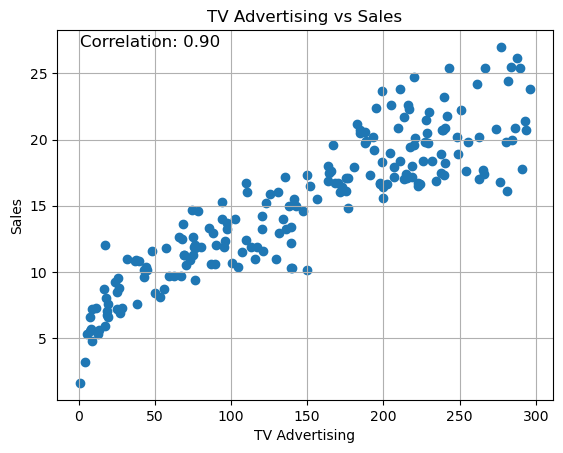

In [35]:
# Calculate the correlation coefficient
correlation = df['TV'].corr(df['Sales'])

# Create a scatter plot
plt.scatter(df['TV'], df['Sales'])
plt.title('TV Advertising vs Sales')
plt.xlabel('TV Advertising')
plt.ylabel('Sales')
plt.grid(True)

# Add correlation coefficient as text
plt.text(df['TV'].min(), df['Sales'].max(), f"Correlation: {correlation:.2f}", fontsize=12)

# Show the plot
plt.show()

There is a positive correlation between TVs and sales

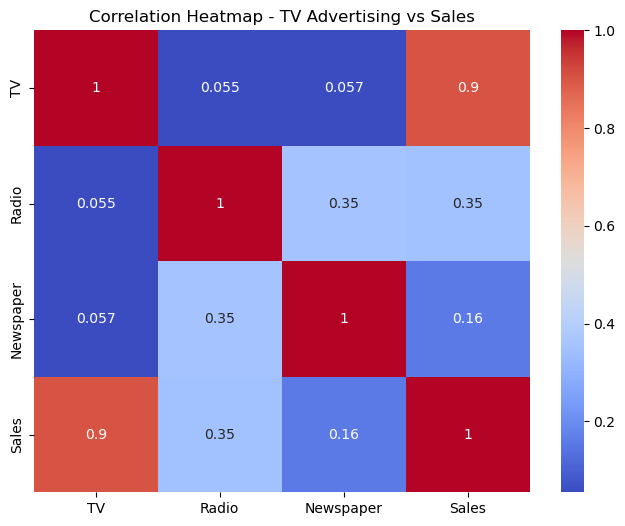

In [36]:
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - TV Advertising vs Sales')
plt.show()

It seems that TVs is the most correlated with sales!

TVs advertising has the most sales, followed by Radios, followed by Newspapers.. and this makes sense because as long as you see and hear about the product will attract you more. But the negative side here is the cost of TVs advertising is the highest.

<a id='conclusions'></a>
## Conclusions

> Finally, after investigating the dataset, and exploring it successflly using visuals to answer the research question, It seems to be clear that TVs advertising has the most sales, so product owners must give TVs the priority of advertising

>Limitations: This analysis was done considering the advertising has only sales volume, and not having the cost of it . This might not be completely error free but by following these suggestion one can increase the probability of a advertising to become a hit. Moreover we are not sure if the data provided to us is completely corect and up-to-date. As mentioned before cost is not included, it might be possible sales volume in some other ways of advertising. So a disparity arises here which can state the complete analysis wrong.